<a href="https://colab.research.google.com/github/YiFurusho/Supreme-Court-Judgment-Prediction/blob/main/Supreme_Court_Judgment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install kaggle
! pip install kaggle

In [11]:
# mount kaggle to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# create a new folder
! mkdir ~/.kaggle

In [4]:
# copy kaggle json file to directory
! cp /content/drive/MyDrive/Dataset/kaggle_API/kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

# **downlaod kaggle dataset**

In [9]:
# downlaod kaggle dataset
! kaggle datasets download deepcontractor/supreme-court-judgment-prediction

Dataset URL: https://www.kaggle.com/datasets/deepcontractor/supreme-court-judgment-prediction
License(s): CC0-1.0
  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 140MB/s]


In [12]:
# unzip the dataset file
! unzip /content/supreme-court-judgment-prediction.zip


Archive:  /content/supreme-court-judgment-prediction.zip
  inflating: justice.csv             


In [13]:
import pandas as pd

In [15]:
# use variable df for the dataset
path = '/content/supreme-court-judgment-prediction.zip'
df = pd.read_csv(path)

In [16]:
# head()
df.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [17]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [18]:
# overview of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3292 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(11)


In [19]:
# identify and count missing value
print(df.isnull().sum())

Unnamed: 0              0
ID                      0
name                    0
href                    0
docket                 11
term                    0
first_party             1
second_party            1
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64


In [24]:
# Check for and count duplicate rows
print(df.duplicated().sum())

0


In [20]:
# For categorical columns, check unique values
for column in df.select_dtypes(include=['object']):
    print(f"\nUnique values in {column}:")
    print(df[column].unique())


Unique values in name:
['Roe v. Wade' 'Stanley v. Illinois' 'Giglio v. United States' ...
 'Terry v. United States' 'United States v. Cooley'
 'PennEast Pipeline Co. v. New Jersey']

Unique values in href:
['https://api.oyez.org/cases/1971/70-18'
 'https://api.oyez.org/cases/1971/70-5014'
 'https://api.oyez.org/cases/1971/70-29' ...
 'https://api.oyez.org/cases/2020/19-1414'
 'https://api.oyez.org/cases/2020/142-orig'
 'https://api.oyez.org/cases/2020/19-1039']

Unique values in docket:
['70-18' '70-5014' '70-29' ... '20-5904' '19-1414' '19-1039']

Unique values in term:
['1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '1956' '1955' '1940-1955' '1957'
 '1958' '1960' '1959' '1961' '1962' '1963' '1964' '1965' '1966' '196

In [21]:
# Ensure data types are appropriate for each column
print(df.dtypes)

Unnamed: 0             int64
ID                     int64
name                  object
href                  object
docket                object
term                  object
first_party           object
second_party          object
facts                 object
facts_len              int64
majority_vote          int64
minority_vote          int64
first_party_winner    object
decision_type         object
disposition           object
issue_area            object
dtype: object


In [22]:
# For numerical columns, look for potential outliers
for column in df.select_dtypes(include=['int64', 'float64']):
    print(f"\nOutliers in {column}:")
    print(df[column].describe())


Outliers in Unnamed: 0:
count    3303.000000
mean     1651.000000
std       953.638296
min         0.000000
25%       825.500000
50%      1651.000000
75%      2476.500000
max      3302.000000
Name: Unnamed: 0, dtype: float64

Outliers in ID:
count     3303.000000
mean     56336.505298
std       3600.259018
min      50606.000000
25%      54339.500000
50%      55260.000000
75%      59437.500000
max      63335.000000
Name: ID, dtype: float64

Outliers in facts_len:
count    3303.000000
mean     1112.496821
std       531.514960
min        26.000000
25%       757.000000
50%      1049.000000
75%      1381.000000
max      6201.000000
Name: facts_len, dtype: float64

Outliers in majority_vote:
count    3303.000000
mean        7.009688
std         1.726244
min         0.000000
25%         5.000000
50%         7.000000
75%         9.000000
max         9.000000
Name: majority_vote, dtype: float64

Outliers in minority_vote:
count    3303.000000
mean        1.727823
std         1.604460
min      

In [23]:
# Examine string columns for inconsistent formatting
for column in df.select_dtypes(include=['object']):
    print(f"\nSample values in {column}:")
    print(df[column].sample(5))


Sample values in name:
1151                                  Calderon v. Coleman
1992    District Attorney's Office for the Third Judic...
1493                             Massaro v. United States
2273    Agency for International Development v. Allian...
1282                                   Kansas v. Colorado
Name: name, dtype: object

Sample values in href:
1129     https://api.oyez.org/cases/1998/98-436
2827    https://api.oyez.org/cases/2013/13-5967
1298     https://api.oyez.org/cases/2000/00-201
153     https://api.oyez.org/cases/1975/74-1044
453     https://api.oyez.org/cases/1984/83-1878
Name: href, dtype: object

Sample values in docket:
1321    00-5961
972      96-320
2338     12-873
2249     12-123
289     78-1268
Name: docket, dtype: object

Sample values in term:
1442    2002
1537    2003
2594    1963
460     1984
3292    2020
Name: term, dtype: object

Sample values in first_party:
1402                                             Ashcroft
2602                            

In [25]:
# For columns with fewer missing values
df['docket'] = df['docket'].fillna('Unknown')
df['first_party'] = df['first_party'].fillna('Unknown')
df['second_party'] = df['second_party'].fillna('Unknown')
df['first_party_winner'] = df['first_party_winner'].fillna('Unknown')
df['decision_type'] = df['decision_type'].fillna('Unknown')

In [26]:
# For columns with more missing values
df['disposition'] = df['disposition'].fillna('Not Specified')
df['issue_area'] = df['issue_area'].fillna('Not Specified')

In [27]:
print(df.isnull().sum())

Unnamed: 0            0
ID                    0
name                  0
href                  0
docket                0
term                  0
first_party           0
second_party          0
facts                 0
facts_len             0
majority_vote         0
minority_vote         0
first_party_winner    0
decision_type         0
disposition           0
issue_area            0
dtype: int64


In [28]:
df.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,Not Specified
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [29]:
df.tail()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
3298,3298,63324,United States v. Palomar-Santiago,https://api.oyez.org/cases/2020/20-437,20-437,2020,United States,Refugio Palomar-Santiago,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,3299,63323,Terry v. United States,https://api.oyez.org/cases/2020/20-5904,20-5904,2020,Tarahrick Terry,United States,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,3300,63331,United States v. Cooley,https://api.oyez.org/cases/2020/19-1414,19-1414,2020,United States,Joshua James Cooley,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,3301,63332,Florida v. Georgia,https://api.oyez.org/cases/2020/142-orig,142-orig,2020,Florida,Georgia,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,Not Specified
3302,3302,63335,PennEast Pipeline Co. v. New Jersey,https://api.oyez.org/cases/2020/19-1039,19-1039,2020,PennEast Pipeline Co. LLC,"New Jersey, et al.","<p>The Natural Gas Act (NGA), 15 U.S.C. §§ 717...",1059,5,4,True,majority opinion,reversed/remanded,Due Process


In [30]:
# obtain summary statistics for numerical columns.
df.describe()

,Unnamed: 0,ID,facts_len,majority_vote,minority_vote
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000
mean,1651.000000,56336.505298,1112.496821,7.009688,1.727823
std,953.638296,3600.259018,531.514960,1.726244,1.604460
min,0.000000,50606.000000,26.000000,0.000000,0.000000
25%,825.500000,54339.500000,757.000000,5.000000,0.000000
50%,1651.000000,55260.000000,1049.000000,7.000000,2.000000
75%,2476.500000,59437.500000,1381.000000,9.000000,3.000000
max,3302.000000,63335.000000,6201.000000,9.000000,4.000000


In [34]:
# to examine the distribution of categories in columns 'term', 'decision_type',  'first_party_winner'
df['term'].value_counts()

,count
term,
1997,97
1996,91
2009,87
2000,86
2005,86
...,...
1957,16
1959,10
1789-1850,10


In [35]:
df['decision_type'].value_counts()

,count
decision_type,
majority opinion,2829
per curiam,267
plurality opinion,153
equally divided,17
dismissal - rule 46,9
dismissal - other,8
Unknown,7
dismissal - improvidently granted,6
dismissal - moot,5


In [36]:
df['first_party_winner'].value_counts()

,count
first_party_winner,
True,2140
False,1148
Unknown,15


In [37]:
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns

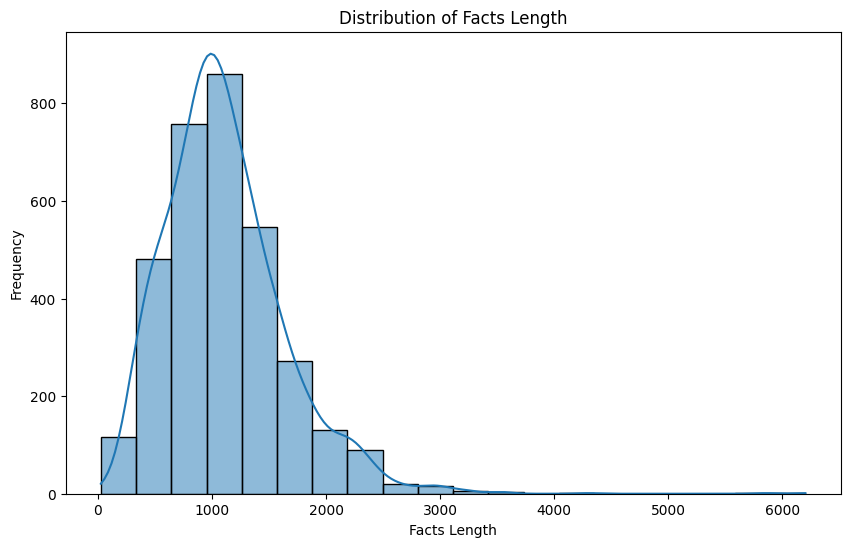

In [38]:
# Create histograms for 'facts_len'
plt.figure(figsize=(10, 6))
sns.histplot(df['facts_len'], bins=20, kde=True)
plt.title('Distribution of Facts Length')
plt.xlabel('Facts Length')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

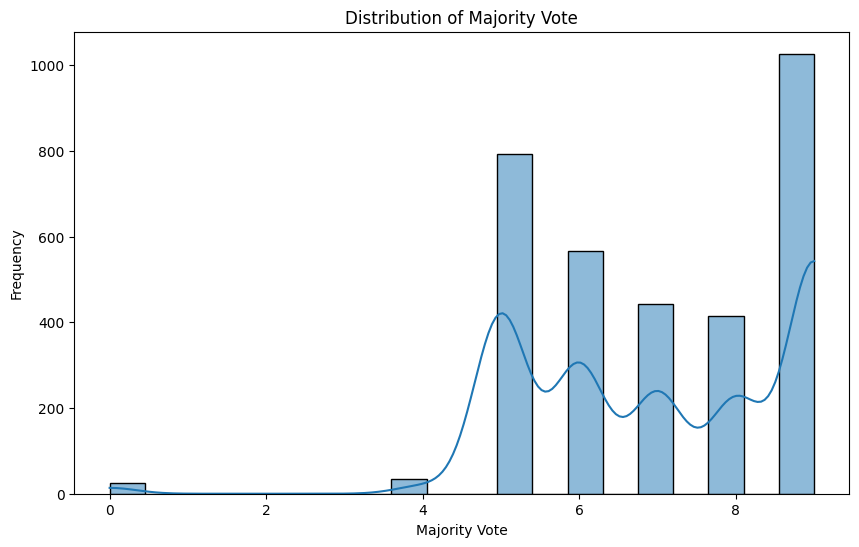

In [40]:
# Create histograms for 'majority_vote'
plt.figure(figsize=(10, 6))
sns.histplot(df['majority_vote'], bins=20, kde=True)
plt.title('Distribution of Majority Vote')
plt.xlabel('Majority Vote')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

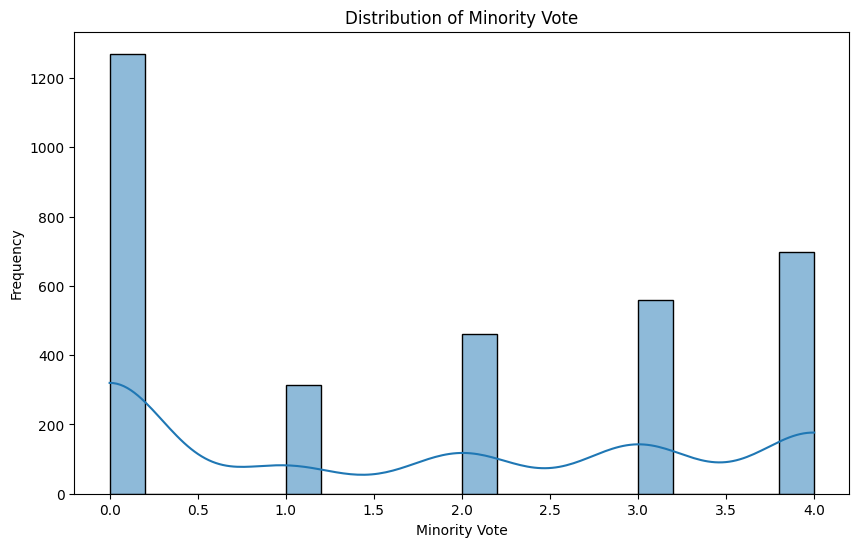

In [41]:
# Create histograms for 'minority_vote'
plt.figure(figsize=(10, 6))
sns.histplot(df['minority_vote'], bins=20, kde=True)
plt.title('Distribution of Minority Vote')
plt.xlabel('Minority Vote')
plt.ylabel('Frequency')


In [47]:
 # Use cross-tabulations to examine relationships between first_party_winner and decision_type
 pd.crosstab(df['first_party_winner'], df['decision_type'])

decision_type,Unknown,dismissal - improvidently granted,dismissal - moot,dismissal - other,dismissal - rule 46,equally divided,majority opinion,memorandum,opinion of the court,per curiam,plurality opinion
first_party_winner,,,,,,,,,,,
False,1,6,4,8,8,17,970,0,0,65,69
True,5,0,1,0,0,0,1849,1,1,199,84
Unknown,1,0,0,0,1,0,10,0,0,3,0


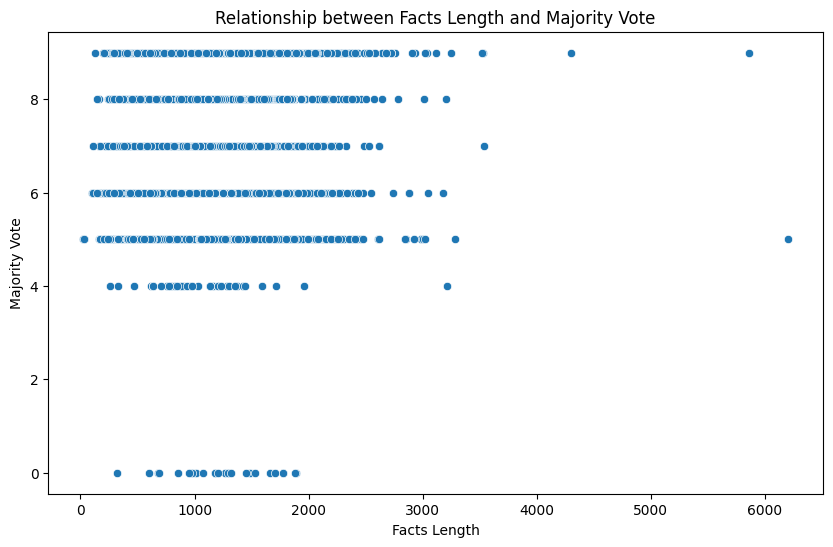

In [46]:
# Create scatter plots to visualize relationships between numerical variables between 'facts_len' and 'majority_vote'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='facts_len', y='majority_vote', data=df)
plt.title('Relationship between Facts Length and Majority Vote')
plt.xlabel('Facts Length')
plt.ylabel('Majority Vote')
plt.show()